In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dataretrieval.nwis as nwis

## Data collection

### Climate data from NOAA 

In [6]:
# Download data from https://www.ncei.noaa.gov
# Yuma,AZ from 2015-01-01 to 2024-12-31, using data collected from YUMA MCAS, AZ US (GHCND:USW00003145)
# https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00003145/detail
# saved as csv file, file name "yuma_climate data.csv"

# Load the CSV file containing yuma's climate data into a pandas DataFrame
# The DataFrame will contain daily weather measurements including:
# - date information
# - maximum temperature readings
# - minimum temperature readings
# - precipitation amounts
df = pd.read_csv("yuma_climate data.csv")

In [8]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  3649 non-null   object 
 1   NAME     3649 non-null   object 
 2   DATE     3649 non-null   object 
 3   PRCP     3640 non-null   float64
 4   SNOW     1924 non-null   float64
 5   SNWD     1814 non-null   float64
 6   TMAX     3610 non-null   float64
 7   TMIN     3621 non-null   float64
 8   WT01     85 non-null     float64
 9   WT02     12 non-null     float64
 10  WT03     148 non-null    float64
 11  WT07     75 non-null     float64
 12  WT08     438 non-null    float64
dtypes: float64(10), object(3)
memory usage: 370.7+ KB


- There are 3649 rows and 13 columns in the dataset.The columns names represent features as below:
    - SNOW - Snowfall
    - WT11 - High or damaging winds
    - WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
    - TMAX - Maximum temperature
    - WT03 - Thunder
    - TMIN - Minimum temperature
    - WT04 - Ice pellets, sleet, snow pellets, or small hail"
    - PRCP - Precipitation
    - WT05 - Hail (may include small hail)
    - TOBS - Temperature at the time of observation
    - WT06 - Glaze or rime
    - SNWD - Snow depth
- we only need Date, Maximum temperature, Minimum temperature, Precipitation from this dataset.


In [11]:
keep_list = ['DATE','PRCP','TMAX','TMIN']
df = df[keep_list]

In [13]:
# Date column needs to be changed to datetime type.
df['DATE'] = pd.to_datetime(df['DATE']).dt.date
df = df.rename(columns={'DATE': 'date'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3649 non-null   object 
 1   PRCP    3640 non-null   float64
 2   TMAX    3610 non-null   float64
 3   TMIN    3621 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.2+ KB


### Fetching the ground water level data from the USGS NWIS via API call using the dataretrieval library

In [16]:
# DESCRIPTION:
#Latitude 32°40'03.04",   Longitude 114°23'56.71"   NAD27
#Yuma County, Arizona   , Hydrologic Unit 15070201
#Well depth: 300.4 feet
#Hole depth: 300.4 feet
#Land surface altitude: 319.0 feet above NGVD29.
#Well completed in "Basin and Range basin-fill aquifers" (N100BSNRGB) national aquifer.
#https://waterdata.usgs.gov/nwis/inventory/?site_no=324003114235701&agency_cd=USGS

site = '324003114235701' # Site number for Fortuna wash well, near Yuma AZ
display(nwis.get_record(sites=site, service='site'))

# get daily values (dv)
df_gwl_yuma = nwis.get_record(sites=site, service='dv', start='2015-01-01', end='2024-12-31').reset_index()

display(df_gwl_yuma.head()) # Raw data

#72019 is a USGS parameter code.
#72019 = Depth to water level, feet below land surface
df_gwl_yuma = df_gwl_yuma[['datetime', '72019_Mean']]
df_gwl_yuma.columns = ['datetime', 'gwl']
df_gwl_yuma['datetime'] = pd.to_datetime(df_gwl_yuma['datetime'])

# Extracting date from datetime
df_gwl_yuma['datetime'] = df_gwl_yuma['datetime'].dt.date

# renameing datetime to date
df_gwl_yuma = df_gwl_yuma.rename(columns={'datetime': 'date'})


display(df_gwl_yuma.head())

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,324003114235701,C-09-21 10ABC1 [FORTUNA WASH WELL],GW,324003.04,1142356.71,32.66756,-114.399865,D,H,...,N,C,YY Y,N100BSNRGB,NaN,U,300.4,300.4,D,YUM


,datetime,site_no,72019_Mean,72019_Mean_cd
0,2015-01-01 00:00:00+00:00,324003114235701,158.62,A
1,2015-01-02 00:00:00+00:00,324003114235701,158.62,A
2,2015-01-03 00:00:00+00:00,324003114235701,158.71,A
3,2015-01-04 00:00:00+00:00,324003114235701,158.83,A
4,2015-01-05 00:00:00+00:00,324003114235701,158.75,A


,date,gwl
0,2015-01-01,158.62
1,2015-01-02,158.62
2,2015-01-03,158.71
3,2015-01-04,158.83
4,2015-01-05,158.75


In [18]:
df_gwl_yuma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3396 non-null   object 
 1   gwl     3396 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.2+ KB


### Soil Temperature data 

In [21]:
# Soil temperature and moisture data for Yuma, AZ
# Data Source: U.S Climate Reference Network (USCRN) | https://data.noaa.gov/onestop/collections/details/536970fd-dd4d-4628-b1d9-38c67ebed636?f=science:Land%20Surface%20%3E%20Soils%20%3E%20Soil%20Temperature&eg=1
# Data Download Link: https://www.ncei.noaa.gov/data/us-climate-reference-network/access/derived-products/soil/soilanom/
# Data Description: https://www.ncei.noaa.gov/data/us-climate-reference-network/doc/derived-products/soilanom01-readme.txt
# save file as a csv named "Yuma_27_ENE.csv"

# read data
soil = pd.read_csv('Yuma_27_ENE.csv')
# display(soil.head())
# Selecting relevant columns
# Selecting Soil Moisture Volumetric Water Content (SMVWC) and Soil Temperature (ST) at 5 and 10 cm depths

soil = soil[['DATE_TIME', 'SMVWC_5_CM', 'ST_5_CM', 'SMVWC_10_CM', 'ST_10_CM']]
# display(soil.head())
# Converting DATE_TIME from YYYYMMDDHH to YYYY-MM-DD format
soil['DATE_TIME'] = pd.to_datetime(soil['DATE_TIME'], format='%Y%m%d%H')

# Extracting date from datetime
soil['DATE_TIME'] = soil['DATE_TIME'].dt.date
# Extracting date range from "2015-01-01" to "2024-12-31"
soil = soil[(soil['DATE_TIME'] >= pd.to_datetime("2015-01-01").date()) & 
            (soil['DATE_TIME'] <= pd.to_datetime("2024-12-31").date())]



# Dropping rows all values as NaN apart from DATE_TIME
soil = soil.dropna(subset=['SMVWC_5_CM', 'ST_5_CM', 'SMVWC_10_CM', 'ST_10_CM'], how='all')
display(soil.tail())
# Grouping by DATE_TIME and taking the mean of the values
# As the originaal DATE_TIME column which had HH also now has been converted to date, the mean of the values for each date will be taken

soil = soil.groupby('DATE_TIME').mean().reset_index()

# Renaming the columns for easier reference
# sm: soil moisture
# st: Soil Temperature

soil.rename(columns={'DATE_TIME': 'date', 'SMVWC_5_CM': 'sm_5cm', 'ST_5_CM': 'st_5cm',
                            'SMVWC_10_CM': 'sm_10cm', 'ST_10_CM': 'st_10cm'}, inplace=True)

soil.head()


,DATE_TIME,SMVWC_5_CM,ST_5_CM,SMVWC_10_CM,ST_10_CM
121414,2024-12-31,0.035,16.5,0.041,14.9
121415,2024-12-31,0.035,19.4,0.039,15.3
121416,2024-12-31,0.035,21.1,0.037,15.7
121417,2024-12-31,0.036,21.7,0.041,16.2
121418,2024-12-31,0.036,22.2,0.042,16.8


,date,sm_5cm,st_5cm,sm_10cm,st_10cm
0,2015-01-01,0.063333,7.062500,0.058375,11.612500
1,2015-01-02,0.064167,7.079167,0.057250,10.854167
2,2015-01-03,0.067045,7.541667,0.056917,10.283333
3,2015-01-04,0.063792,9.362500,0.057625,11.045833
4,2015-01-05,0.068250,13.379167,0.059042,13.375000


In [23]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     3653 non-null   object 
 1   sm_5cm   3587 non-null   float64
 2   st_5cm   3653 non-null   float64
 3   sm_10cm  3653 non-null   float64
 4   st_10cm  3653 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.8+ KB


### Stream flow data

In [26]:
# Yuma main canal
# https://dashboard.waterdata.usgs.gov/api/gwis/2.1.1/service/site?agencyCode=USGS&siteNumber=09526000&open=6949
# detail https://waterdata.usgs.gov/monitoring-location/09526000/#dataTypeId=continuous-00060-0&period=P7D&showMedian=true
site = '09526000' # Yuma, AZ
display(nwis.get_record(sites=site, service='site')) # Site information

# get instantaneous values (iv)
df_yuma_canal = nwis.get_record(sites=site, service='dv', start='2015-01-01', end='2024-12-31').reset_index()

display(df_yuma_canal.head()) # Raw data

df_yuma_canal = df_yuma_canal[['datetime', '00060_Mean']]
df_yuma_canal.columns = ['datetime', 'daily_discharge_cfs']

df_yuma_canal['datetime'] = df_yuma_canal['datetime'].dt.date # Extracting date from datetime

# renameing datetime to date
df_yuma_canal = df_yuma_canal.rename(columns={'datetime': 'date'})

display(df_yuma_canal.head())


,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,09526000,DIVERSION FROM YUMA MAIN CANAL FOR YUMA MUNICIPAL,ST-CA,324335,1143702,32.726389,-114.617222,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,datetime,site_no,00060_Mean,00060_Mean_cd
0,2015-01-01 00:00:00+00:00,09526000,14.6,A
1,2015-01-02 00:00:00+00:00,09526000,17.8,A
2,2015-01-03 00:00:00+00:00,09526000,18.8,A
3,2015-01-04 00:00:00+00:00,09526000,18.5,A
4,2015-01-05 00:00:00+00:00,09526000,20.5,A


,date,daily_discharge_cfs
0,2015-01-01,14.6
1,2015-01-02,17.8
2,2015-01-03,18.8
3,2015-01-04,18.5
4,2015-01-05,20.5


### Combine all the data together

In [29]:
# checking for min and max dates for each dataset

print('Air temperature and precipitation data')
print('Min date:', df.date.min())
print('Max date:', df.date.max())

print('GWL data')
print('Min date:', df_gwl_yuma.date.min())
print('Max date:', df_gwl_yuma.date.max())

print('Streamflow data')
print('Min date:', df_yuma_canal.date.min())
print('Max date:', df_yuma_canal.date.max())

print('Soil moisture and temperature data')
print('Min date:', soil.date.min())
print('Max date:', soil.date.max())


Air temperature and precipitation data
Min date: 2015-01-01
Max date: 2024-12-31
GWL data
Min date: 2015-01-01
Max date: 2024-12-31
Streamflow data
Min date: 2015-01-01
Max date: 2024-12-31
Soil moisture and temperature data
Min date: 2015-01-01
Max date: 2024-12-31


In [39]:
# merging all datasets

df_yuma = df.merge(df_gwl_yuma, on='date', how='inner')
df_yuma = df_yuma.merge(soil, on='date', how='inner')
df_yuma = df_yuma.merge(df_yuma_canal, on='date', how='inner')


# dropping rows with missing values
df_yuma = df_yuma.dropna()
# reset index
df_yuma.reset_index(drop=True, inplace=True)

df_yuma.head()

,date,PRCP,TMAX,TMIN,gwl,sm_5cm,st_5cm,sm_10cm,st_10cm,daily_discharge_cfs
0,2015-01-13,0.0,72.0,49.0,158.53,0.091375,15.645833,0.065000,17.433333,18.0
1,2015-01-14,0.0,71.0,49.0,158.62,0.095750,14.670833,0.064250,16.545833,18.6
2,2015-01-15,0.0,74.0,51.0,158.72,0.097792,14.233333,0.063875,16.345833,19.0
3,2015-01-16,0.0,77.0,52.0,158.63,0.099042,14.658333,0.064042,16.441667,19.3
4,2015-01-17,0.0,77.0,50.0,158.62,0.098250,14.870833,0.064125,16.629167,18.5


In [160]:
df_yuma['date']=pd.to_datetime(df_yuma['date'])

In [162]:
df_yuma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3276 non-null   datetime64[ns]
 1   PRCP                 3276 non-null   float64       
 2   TMAX                 3276 non-null   float64       
 3   TMIN                 3276 non-null   float64       
 4   gwl                  3276 non-null   float64       
 5   sm_5cm               3276 non-null   float64       
 6   st_5cm               3276 non-null   float64       
 7   sm_10cm              3276 non-null   float64       
 8   st_10cm              3276 non-null   float64       
 9   daily_discharge_cfs  3276 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 256.1 KB


### Drought Data from NIDIS (National Integrated Drought Information System)

In [43]:
drought = pd.read_csv('USDM-yuma-county-az.csv')
drought.head()

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20250415,4027,Yuma County,AZ,0.0,100.0,100.0,100.0,100.0,0.0,2025-04-15,2025-04-21,1
1,20250408,4027,Yuma County,AZ,0.0,100.0,100.0,100.0,100.0,0.0,2025-04-08,2025-04-14,1
2,20250401,4027,Yuma County,AZ,0.0,100.0,100.0,100.0,100.0,0.0,2025-04-01,2025-04-07,1
3,20250325,4027,Yuma County,AZ,0.0,100.0,100.0,100.0,100.0,0.0,2025-03-25,2025-03-31,1
4,20250318,4027,Yuma County,AZ,0.0,100.0,100.0,100.0,100.0,0.0,2025-03-18,2025-03-24,1


In [45]:
# Drought data for yuma AZ
# Source: https://www.drought.gov/location/Yuma,%20AZ,%20USA
# Data Descroiption: https://www.drought.gov/data-maps-tools/historical-drought-data-conditions-tool
# save data as a csv file, name "USDM-yuma-county-az"

drought = pd.read_csv('USDM-yuma-county-az.csv')

# deletiong State,County,FIPS, StatisticFormatID, MapDate columns
drought = drought.drop(['State', 'County','FIPS','StatisticFormatID', 'MapDate'], axis=1)

# creating a new column date, for all dates between ValidStart and ValidEnd and replicating the row for each date

drought['ValidStart'] = pd.to_datetime(drought['ValidStart'])
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

drought['date'] = drought.apply(lambda x: pd.date_range(start=x['ValidStart'], end=x['ValidEnd'], freq='D'), axis=1)
drought = drought.explode('date')
drought = drought.drop(['ValidStart', 'ValidEnd'], axis=1)

# Sorting the dataframe by date
drought = drought.sort_values(by='date')

# Dropping rows with duplicate dates
drought = drought.drop_duplicates(subset='date', keep='first')
# Extract data from date range "2015-01-01" to "2024-12-31"
drought = drought[(drought['date']>= pd.to_datetime('2015-01-01'))&(drought['date']<= pd.to_datetime('2024-12-31'))]

# Resetting the index
drought = drought.reset_index(drop=True)

drought.head()


,None,D0,D1,D2,D3,D4,date
0,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-01
1,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-02
2,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-03
3,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-04
4,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-05


In [47]:
drought.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   None    3653 non-null   float64       
 1   D0      3653 non-null   float64       
 2   D1      3653 non-null   float64       
 3   D2      3653 non-null   float64       
 4   D3      3653 non-null   float64       
 5   D4      3653 non-null   float64       
 6   date    3653 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 199.9 KB


There are 3653 rows and 7 columns in the dataset.
- D0: Abnormally Dry
- D1: Moderate Drought
- D2: Severe Drought
- D3: Extreme Drought
- D4: Exceptional Drought

In [164]:
# Saving the merged dataframe as a parquet file

df_yuma.to_parquet('yuma.parquet')
drought.to_parquet('target.parquet')

## Data preparation

In [166]:
# read the climate data
df_final = pd.read_parquet('yuma.parquet')
df_final.head()

,date,PRCP,TMAX,TMIN,gwl,sm_5cm,st_5cm,sm_10cm,st_10cm,daily_discharge_cfs
0,2015-01-13,0.0,72.0,49.0,158.53,0.091375,15.645833,0.065000,17.433333,18.0
1,2015-01-14,0.0,71.0,49.0,158.62,0.095750,14.670833,0.064250,16.545833,18.6
2,2015-01-15,0.0,74.0,51.0,158.72,0.097792,14.233333,0.063875,16.345833,19.0
3,2015-01-16,0.0,77.0,52.0,158.63,0.099042,14.658333,0.064042,16.441667,19.3
4,2015-01-17,0.0,77.0,50.0,158.62,0.098250,14.870833,0.064125,16.629167,18.5


In [168]:
# read target data
df_target = pd.read_parquet('target.parquet')
df_target.head()

,None,D0,D1,D2,D3,D4,date
0,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-01
1,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-02
2,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-03
3,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-04
4,0.0,100.0,42.74,0.0,0.0,0.0,2015-01-05


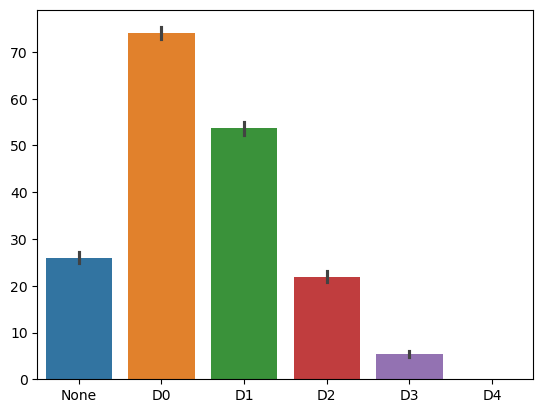

In [170]:
# bar plot 
sns.barplot(data=df_target);


In [172]:
sum(df_target.D4 != 0)

0

In [174]:
# drop irrelevant columns in target data
# keeo D3 for the targeted class, as D4 is all 0.
df_target=df_target.drop(['D0', 'D1', 'D2', 'D4', 'None'],axis=1)
df_target.head()

,D3,date
0,0.0,2015-01-01
1,0.0,2015-01-02
2,0.0,2015-01-03
3,0.0,2015-01-04
4,0.0,2015-01-05


In [176]:
sum(df_target.D3 != 0)

421

In [178]:
# replacing values where D3 not equal to 0 to 1 to indicate extreme weather like Extreme Drought
df_target.loc[df_target['D3'] != 0, 'D3'] = 1
df_target['D3'] = df_target['D3'].astype(int)

In [184]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3276 non-null   datetime64[ns]
 1   PRCP                 3276 non-null   float64       
 2   TMAX                 3276 non-null   float64       
 3   TMIN                 3276 non-null   float64       
 4   gwl                  3276 non-null   float64       
 5   sm_5cm               3276 non-null   float64       
 6   st_5cm               3276 non-null   float64       
 7   sm_10cm              3276 non-null   float64       
 8   st_10cm              3276 non-null   float64       
 9   daily_discharge_cfs  3276 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 256.1 KB


In [186]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   D3      3653 non-null   int64         
 1   date    3653 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 57.2 KB


In [190]:
# Merge the df_final DataFrame with the df_target DataFrame on the 'date' column using the merge() method with how='left'. 
# Update the df_final DataFrame with the merged result.

df_final = df_final.merge(df_target, on='date', how='left')


In [192]:
df_final.head()

,date,PRCP,TMAX,TMIN,gwl,sm_5cm,st_5cm,sm_10cm,st_10cm,daily_discharge_cfs,D3
0,2015-01-13,0.0,72.0,49.0,158.53,0.091375,15.645833,0.065000,17.433333,18.0,0
1,2015-01-14,0.0,71.0,49.0,158.62,0.095750,14.670833,0.064250,16.545833,18.6,0
2,2015-01-15,0.0,74.0,51.0,158.72,0.097792,14.233333,0.063875,16.345833,19.0,0
3,2015-01-16,0.0,77.0,52.0,158.63,0.099042,14.658333,0.064042,16.441667,19.3,0
4,2015-01-17,0.0,77.0,50.0,158.62,0.098250,14.870833,0.064125,16.629167,18.5,0


In [194]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3276 non-null   datetime64[ns]
 1   PRCP                 3276 non-null   float64       
 2   TMAX                 3276 non-null   float64       
 3   TMIN                 3276 non-null   float64       
 4   gwl                  3276 non-null   float64       
 5   sm_5cm               3276 non-null   float64       
 6   st_5cm               3276 non-null   float64       
 7   sm_10cm              3276 non-null   float64       
 8   st_10cm              3276 non-null   float64       
 9   daily_discharge_cfs  3276 non-null   float64       
 10  D3                   3276 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 281.7 KB


In [196]:
df_final.to_parquet('yuma_final.parquet')